# Preprocessing danych

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import torch.nn as nn
import torch
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader


In [2]:
money = 100000
debt = 250000

print("cheap: ", 0, " - ",money)
print("average: ", money, " - ", debt+money)
print("expensive: ", debt+money, " - ", "inf")

cheap:  0  -  100000
average:  100000  -  350000
expensive:  350000  -  inf


# Initial data viewing

In [3]:
with open('zadanie_studenci/train_data.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)


df = pd.DataFrame(data[1:], columns=data[0])

missing_values = df.isnull().sum()
print(missing_values)

SalePrice                    0
YearBuilt                    0
Size(sqf)                    0
Floor                        0
HallwayType                  0
HeatingType                  0
AptManageType                0
N_Parkinglot(Ground)         0
N_Parkinglot(Basement)       0
TimeToBusStop                0
TimeToSubway                 0
N_manager                    0
N_elevators                  0
SubwayStation                0
N_FacilitiesInApt            0
N_FacilitiesNearBy(Total)    0
N_SchoolNearBy(Total)        0
dtype: int64


In [4]:
df.describe()

,SalePrice,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
count,4124,4124,4124,4124,4124,4124,4124,4124,4124,4124,4124,4124,4124,4124,4124,4124,4124
unique,841,16,89,43,3,2,2,23,20,3,5,9,13,8,9,11,14
top,149274,2007,914,4,terraced,individual_heating,management_in_trust,67.0,536.0,0~5min,0-5min,6.0,0.0,Kyungbuk_uni_hospital,4,9.0,17.0
freq,38,881,683,228,2485,3938,3869,512,690,3148,1960,1017,735,1125,1003,1493,824


In [5]:
columns_with_types = {}

for column in df.columns:
    numeric_series = pd.to_numeric(df[column], errors='coerce')

    if not numeric_series.isna().any():
        if (numeric_series == numeric_series.astype(int)).all():
            print(f"{column} has type: int")
            columns_with_types[column] = "int"
        else:
            print(f"{column} has type: float")
            columns_with_types[column] = "float"
    else:
        print(f"{column} has type: string")
        columns_with_types[column] = "string"


SalePrice has type: int
YearBuilt has type: int
Size(sqf) has type: int
Floor has type: int
HallwayType has type: string
HeatingType has type: string
AptManageType has type: string
N_Parkinglot(Ground) has type: int
N_Parkinglot(Basement) has type: int
TimeToBusStop has type: string
TimeToSubway has type: string
N_manager has type: int
N_elevators has type: int
SubwayStation has type: string
N_FacilitiesInApt has type: int
N_FacilitiesNearBy(Total) has type: int
N_SchoolNearBy(Total) has type: int


In [6]:
columns_with_types

{'SalePrice': 'int',
 'YearBuilt': 'int',
 'Size(sqf)': 'int',
 'Floor': 'int',
 'HallwayType': 'string',
 'HeatingType': 'string',
 'AptManageType': 'string',
 'N_Parkinglot(Ground)': 'int',
 'N_Parkinglot(Basement)': 'int',
 'TimeToBusStop': 'string',
 'TimeToSubway': 'string',
 'N_manager': 'int',
 'N_elevators': 'int',
 'SubwayStation': 'string',
 'N_FacilitiesInApt': 'int',
 'N_FacilitiesNearBy(Total)': 'int',
 'N_SchoolNearBy(Total)': 'int'}

In [7]:
numerical_columns = []
categorical_columns = []

for column, _type in columns_with_types.items():
    if _type == "int" or _type == "float":
        numerical_columns.append(column)
    else:
        categorical_columns.append(column)

print("Numerical columns: ", numerical_columns)
print("Categorical columns: ", categorical_columns)

Numerical columns:  ['SalePrice', 'YearBuilt', 'Size(sqf)', 'Floor', 'N_Parkinglot(Ground)', 'N_Parkinglot(Basement)', 'N_manager', 'N_elevators', 'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(Total)']
Categorical columns:  ['HallwayType', 'HeatingType', 'AptManageType', 'TimeToBusStop', 'TimeToSubway', 'SubwayStation']


In [8]:
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

In [9]:
for colm in categorical_columns:
    value_counts = df[colm].value_counts()
    print(f"{colm} has unique values: {value_counts.to_dict()}")

HallwayType has unique values: {'terraced': 2485, 'mixed': 1194, 'corridor': 445}
HeatingType has unique values: {'individual_heating': 3938, 'central_heating': 186}
AptManageType has unique values: {'management_in_trust': 3869, 'self_management': 255}
TimeToBusStop has unique values: {'0~5min': 3148, '5min~10min': 938, '10min~15min': 38}
TimeToSubway has unique values: {'0-5min': 1960, '5min~10min': 792, '15min~20min': 682, '10min~15min': 526, 'no_bus_stop_nearby': 164}
SubwayStation has unique values: {'Kyungbuk_uni_hospital': 1125, 'Myung-duk': 1065, 'Banwoldang': 531, 'Bangoge': 512, 'Sin-nam': 468, 'no_subway_nearby': 276, 'Chil-sung-market': 85, 'Daegu': 62}


In [10]:
df['SalePrice'] = df['SalePrice'].astype(int)

min_target = df['SalePrice'].min()
max_target = df['SalePrice'].max()

def categorize_target(value):
    if value < money:
        return 0
    elif value < debt + money:
        return 1
    else:
        return 2

df['price_category'] = df['SalePrice'].apply(categorize_target)
df.drop(columns=['SalePrice'], inplace=True)

target_counts = df['price_category'].value_counts().to_dict()

print("Target counts: ", target_counts)
print("Max target: ", max_target)
print("Min target: ", min_target)

Target counts:  {1: 2998, 2: 570, 0: 556}
Max target:  585840
Min target:  34070


# With this knowledge we start data preprocessing

- Plan is like this: for now to leave the numerical vals as they are and to just convert the data to ints
- for coulumns TimeToBusStop, TimeToSubway do index encoding, as is thinkt that actually it will be good for the model to have a correlation that 10-15 minutes is closer to 5-10mins then 0-5 mins
- turn year built to years old

# Label encoding

In [11]:
idx_bus_stop = data[0].index("TimeToBusStop")
idx_subway = data[0].index("TimeToSubway")
idx_heating = data[0].index("HeatingType")
idx_apt_manage = data[0].index("AptManageType")

bus_stop_mapping_str_to_int = {"0~5min": 3, "5min~10min": 2, "10min~15min": 1}
bus_stop_mapping_int_to_str = {v: k for k, v in bus_stop_mapping_str_to_int.items()}

subway_mapping_str_to_int = {"no_bus_stop_nearby": 0, "0-5min": 4, "5min~10min": 3, "10min~15min": 2, "15min~20min": 1}
subway_mapping_int_to_str = {v: k for k, v in subway_mapping_str_to_int.items()}

heat_mapping_str_to_int = {"individual_heating": 1, "central_heating": 0}
heat_mapping_int_to_str = {v: k for k, v in heat_mapping_str_to_int.items()}

apt_mapping_str_to_int = {"management_in_trust": 1, "self_management": 0}
apt_mapping_int_to_str = {v: k for k, v in apt_mapping_str_to_int.items()}

df['TimeToBusStop'] = df['TimeToBusStop'].map(bus_stop_mapping_str_to_int)
df['TimeToSubway'] = df['TimeToSubway'].map(subway_mapping_str_to_int)
df['HeatingType'] = df['HeatingType'].map(heat_mapping_str_to_int)
df['AptManageType'] = df['AptManageType'].map(apt_mapping_str_to_int)

print(df[['TimeToBusStop', 'TimeToSubway', 'HeatingType', 'AptManageType']].head())

print("Unique values in TimeToBusStop:", df['TimeToBusStop'].unique())
print("Unique values in TimeToSubway:", df['TimeToSubway'].unique())
print("Unique values in HeatingType:", df['HeatingType'].unique())
print("Unique values in AptManageType:", df['AptManageType'].unique())

   TimeToBusStop  TimeToSubway  HeatingType  AptManageType
0              2             2            1              1
1              3             3            1              0
2              3             3            1              0
3              3             4            1              1
4              2             1            1              0
Unique values in TimeToBusStop: [2 3 1]
Unique values in TimeToSubway: [2 3 4 1 0]
Unique values in HeatingType: [1 0]
Unique values in AptManageType: [1 0]


In [12]:
df.describe(include='all')

,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),price_category
count,4124.000000,4124.000000,4124.000000,4124,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124,4124.000000,4124.000000,4124.000000,4124.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,terraced,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kyungbuk_uni_hospital,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1125,NaN,NaN,NaN,NaN
mean,2002.977934,959.958778,11.994665,NaN,0.954898,0.938167,192.789040,572.857662,2.754122,2.897672,6.313773,11.055771,NaN,5.824200,9.860330,10.872696,1.003395
std,8.765838,384.548456,7.581330,NaN,0.207553,0.240882,215.455916,408.179957,0.451553,1.269697,3.224556,7.717030,NaN,2.344331,3.444848,4.427445,0.522581
min,1978.000000,135.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000
25%,1993.000000,644.000000,6.000000,NaN,1.000000,1.000000,11.000000,184.000000,3.000000,2.000000,5.000000,5.000000,NaN,4.000000,8.000000,7.000000,1.000000
50%,2006.000000,910.000000,11.000000,NaN,1.000000,1.000000,100.000000,536.000000,3.000000,3.000000,6.000000,11.000000,NaN,5.000000,9.000000,10.000000,1.000000
75%,2007.000000,1160.000000,17.000000,NaN,1.000000,1.000000,249.000000,798.000000,3.000000,4.000000,8.000000,16.000000,NaN,7.000000,13.000000,15.000000,1.000000


In [13]:
# turn year build to age
df['YearBuilt'] = 2015 - df['YearBuilt']

In [14]:
df.describe(include='all')

,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),price_category
count,4124.000000,4124.000000,4124.000000,4124,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124,4124.000000,4124.000000,4124.000000,4124.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,terraced,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kyungbuk_uni_hospital,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1125,NaN,NaN,NaN,NaN
mean,12.022066,959.958778,11.994665,NaN,0.954898,0.938167,192.789040,572.857662,2.754122,2.897672,6.313773,11.055771,NaN,5.824200,9.860330,10.872696,1.003395
std,8.765838,384.548456,7.581330,NaN,0.207553,0.240882,215.455916,408.179957,0.451553,1.269697,3.224556,7.717030,NaN,2.344331,3.444848,4.427445,0.522581
min,0.000000,135.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000
25%,8.000000,644.000000,6.000000,NaN,1.000000,1.000000,11.000000,184.000000,3.000000,2.000000,5.000000,5.000000,NaN,4.000000,8.000000,7.000000,1.000000
50%,9.000000,910.000000,11.000000,NaN,1.000000,1.000000,100.000000,536.000000,3.000000,3.000000,6.000000,11.000000,NaN,5.000000,9.000000,10.000000,1.000000
75%,22.000000,1160.000000,17.000000,NaN,1.000000,1.000000,249.000000,798.000000,3.000000,4.000000,8.000000,16.000000,NaN,7.000000,13.000000,15.000000,1.000000


In [15]:
df = pd.get_dummies(df, columns=['HallwayType', 'SubwayStation'])

bool_columns = df.select_dtypes(include=['bool']).columns.tolist()
df[bool_columns] = df[bool_columns].astype(int)

In [16]:
df.describe(include='all')

,YearBuilt,Size(sqf),Floor,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,...,HallwayType_mixed,HallwayType_terraced,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby
count,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,...,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000
mean,12.022066,959.958778,11.994665,0.954898,0.938167,192.789040,572.857662,2.754122,2.897672,6.313773,...,0.289525,0.602570,0.124151,0.128758,0.020611,0.015034,0.272793,0.258244,0.113482,0.066925
std,8.765838,384.548456,7.581330,0.207553,0.240882,215.455916,408.179957,0.451553,1.269697,3.224556,...,0.453597,0.489426,0.329794,0.334973,0.142096,0.121703,0.445450,0.437722,0.317220,0.249923
min,0.000000,135.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,644.000000,6.000000,1.000000,1.000000,11.000000,184.000000,3.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,910.000000,11.000000,1.000000,1.000000,100.000000,536.000000,3.000000,3.000000,6.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22.000000,1160.000000,17.000000,1.000000,1.000000,249.000000,798.000000,3.000000,4.000000,8.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,37.000000,2337.000000,43.000000,1.000000,1.000000,713.000000,1321.000000,3.000000,4.000000,14.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
numerical_columns.remove('SalePrice')

In [18]:
target = df['price_category']
data = df.drop(columns=['price_category'])

data_num = data[numerical_columns]
data_cat = data[data.columns.difference(numerical_columns)]

In [19]:
train_indices = np.random.rand(len(data))>0.2

train_data_num = data_num[train_indices]
train_data_cat = data_cat[train_indices]
train_target = target[train_indices]

test_data_num = data_num[~train_indices]
test_data_cat = data_cat[~train_indices]
test_target = target[~train_indices]


# normalize the data
- test_set the same as train set so that there is no data leakage

In [20]:
scaler = MinMaxScaler()
train_data_num = scaler.fit_transform(train_data_num)
test_data_num = scaler.transform(test_data_num)

In [21]:
train_data_num = torch.tensor(train_data_num, dtype=torch.float32)
train_data_cat = torch.tensor(train_data_cat.values, dtype=torch.float32)
train_target = torch.tensor(train_target.values, dtype=torch.int64)

test_data_num = torch.tensor(test_data_num, dtype=torch.float32)
test_data_cat = torch.tensor(test_data_cat.values, dtype=torch.float32)
test_target = torch.tensor(test_target.values, dtype=torch.int64)

train_dataset = torch.utils.data.TensorDataset(train_data_num, train_data_cat, train_target)
test_dataset = torch.utils.data.TensorDataset(test_data_num, test_data_cat, test_target)

In [22]:
class FlatClassifier(nn.Module):
    def __init__(self,size_1,size_2):
        super(FlatClassifier, self).__init__()
        self.layer1 = nn.Linear(train_data_num.shape[1] + train_data_cat.shape[1], size_1)
        self.bn1 = nn.BatchNorm1d(size_1)
        self.act_1 = nn.LeakyReLU()
        self.d1 = nn.Dropout(0.4)
        self.layer2 = nn.Linear(size_1, size_2)
        self.bn2 = nn.BatchNorm1d(size_2)
        self.act_2 = nn.LeakyReLU()
        self.d2 = nn.Dropout(0.4)
        self.layer3 = nn.Linear(size_2, 3)
    def forward(self, x, cat_x):
        x = torch.cat([x,cat_x],dim=1)
        x = self.layer1(x)
        x = self.bn1(x)
        x = self.act_1(x)
        x = self.d1(x)
        x = self.layer2(x)
        x = self.bn2(x)
        x = self.act_2(x)
        x = self.d2(x)
        output = self.layer3(x)
        return output

In [23]:
def get_accuracy(model, data_loader):
    correct = 0
    total = 0
    model.eval()
    for x, cat_x, labels in data_loader:
        x, cat_x, labels = x.to(device), cat_x.to(device), labels.to(device)
        output = model(x, cat_x)
        pred = output>0
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += x.shape[0]
    return correct / total

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [44]:
model = FlatClassifier(40, 20).to(device)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.00001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

iters = []
losses = []
train_acc = []
val_acc = []
for n in range(100):
    epoch_losses = []
    for num_data, cat_data, target_batch in train_loader:
        num_data = num_data.float().to(device)
        cat_data = cat_data.float().to(device)
        target_batch = target_batch.long().to(device)
        model.train()

        outputs = model(num_data, cat_data)
        loss = criterion(outputs, target_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_losses.append(loss.item())

    loss_mean = np.array(epoch_losses).mean()
    iters.append(n)
    losses.append(loss_mean)

    model.eval()
    with torch.no_grad():
        correct_train = 0
        total_train = 0
        for num_data, cat_data, target_batch in train_loader:
            num_data = num_data.float().to(device)
            cat_data = cat_data.float().to(device)
            target_batch = target_batch.long().to(device)
            outputs = model(num_data, cat_data)
            _, predicted = torch.max(outputs.data, 1)
            total_train += target_batch.size(0)
            correct_train += (predicted == target_batch).sum().item()
        train_accuracy = correct_train / total_train

        correct_test = 0
        total_test = 0
        for num_data, cat_data, target_batch in test_loader:
            num_data = num_data.float().to(device)
            cat_data = cat_data.float().to(device)
            target_batch = target_batch.long().to(device)
            outputs = model(num_data, cat_data)
            _, predicted = torch.max(outputs.data, 1)
            total_test += target_batch.size(0)
            correct_test += (predicted == target_batch).sum().item()
        test_accuracy = correct_test / total_test

    train_acc.append(train_accuracy)
    val_acc.append(test_accuracy)
    scheduler.step(loss_mean)

    print(f"Epoch {n} loss {loss_mean:.3f} train_acc: {train_accuracy:.3f} test_acc: {test_accuracy:.3f}")

print("Final Training Accuracy: {:.3f}".format(train_acc[-1]))
print("Final Validation Accuracy: {:.3f}".format(val_acc[-1]))

Epoch 0 loss 0.873 train_acc: 0.743 test_acc: 0.741
Epoch 1 loss 0.676 train_acc: 0.784 test_acc: 0.776
Epoch 2 loss 0.592 train_acc: 0.795 test_acc: 0.794
Epoch 3 loss 0.549 train_acc: 0.830 test_acc: 0.828
Epoch 4 loss 0.512 train_acc: 0.835 test_acc: 0.837
Epoch 5 loss 0.497 train_acc: 0.840 test_acc: 0.851
Epoch 6 loss 0.486 train_acc: 0.843 test_acc: 0.845
Epoch 7 loss 0.452 train_acc: 0.841 test_acc: 0.846
Epoch 8 loss 0.442 train_acc: 0.842 test_acc: 0.849
Epoch 9 loss 0.435 train_acc: 0.838 test_acc: 0.845
Epoch 10 loss 0.432 train_acc: 0.836 test_acc: 0.846
Epoch 11 loss 0.414 train_acc: 0.836 test_acc: 0.843
Epoch 12 loss 0.415 train_acc: 0.844 test_acc: 0.851
Epoch 13 loss 0.407 train_acc: 0.840 test_acc: 0.849
Epoch 14 loss 0.415 train_acc: 0.843 test_acc: 0.851
Epoch 15 loss 0.401 train_acc: 0.841 test_acc: 0.855
Epoch 16 loss 0.390 train_acc: 0.847 test_acc: 0.857
Epoch 17 loss 0.388 train_acc: 0.856 test_acc: 0.856
Epoch 18 loss 0.383 train_acc: 0.845 test_acc: 0.860
Epo

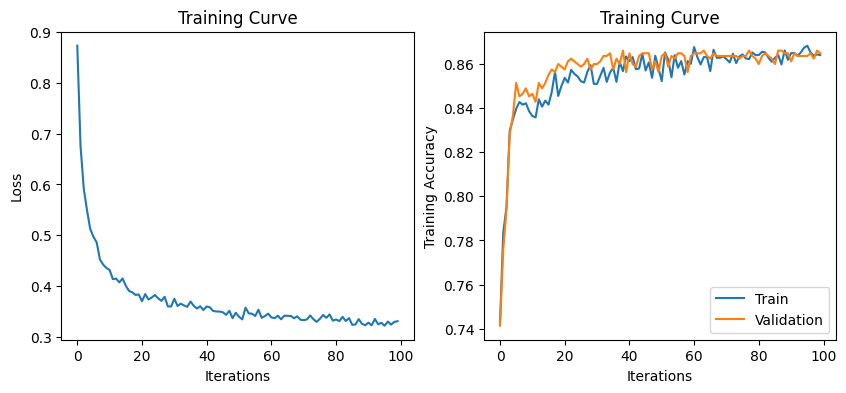

In [45]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Training Curve")
plt.plot(iters, losses, label="Train")
plt.xlabel("Iterations")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.title("Training Curve")
plt.plot(iters, train_acc, label="Train")
plt.plot(iters, val_acc, label="Validation")
plt.xlabel("Iterations")
plt.ylabel("Training Accuracy")
plt.legend(loc='best')
plt.show()

# Ladujemy zbior testowy i generujemy predykcje do pliku

In [27]:
with open('zadanie_studenci/test_data.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

df_t = pd.DataFrame(data[1:], columns=data[0])

missing_values = df_t.isnull().sum()
print(missing_values)

YearBuilt                    0
Size(sqf)                    0
Floor                        0
HallwayType                  0
HeatingType                  0
AptManageType                0
N_Parkinglot(Ground)         0
N_Parkinglot(Basement)       0
TimeToBusStop                0
TimeToSubway                 0
N_manager                    0
N_elevators                  0
SubwayStation                0
N_FacilitiesInApt            0
N_FacilitiesNearBy(Total)    0
N_SchoolNearBy(Total)        0
dtype: int64


# do the same data preprocessing as in training dataset

In [28]:
df_t[numerical_columns] = df_t[numerical_columns].apply(pd.to_numeric, errors='coerce')

df_t['TimeToBusStop'] = df_t['TimeToBusStop'].map(bus_stop_mapping_str_to_int)
df_t['TimeToSubway'] = df_t['TimeToSubway'].map(subway_mapping_str_to_int)
df_t['HeatingType'] = df_t['HeatingType'].map(heat_mapping_str_to_int)
df_t['AptManageType'] = df_t['AptManageType'].map(apt_mapping_str_to_int)

df_t['YearBuilt'] = 2015 - df_t['YearBuilt']

df_t = pd.get_dummies(df_t, columns=['HallwayType', 'SubwayStation'])

bool_columns = df_t.select_dtypes(include=['bool']).columns.tolist()
df_t[bool_columns] = df_t[bool_columns].astype(int)

df_t[numerical_columns] = scaler.transform(df_t[numerical_columns])

In [29]:
df_t.describe(include='all')

,YearBuilt,Size(sqf),Floor,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,...,HallwayType_mixed,HallwayType_terraced,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby
count,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,...,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000
mean,0.325869,0.367995,0.264290,0.935484,0.946802,0.284861,0.428365,2.760611,2.861347,0.407862,...,0.280702,0.610640,0.127334,0.122807,0.016978,0.013016,0.293718,0.250141,0.103565,0.072439
std,0.241096,0.171419,0.177946,0.245740,0.224491,0.316488,0.310161,0.448818,1.258050,0.234918,...,0.449469,0.487743,0.333442,0.328308,0.129225,0.113377,0.455593,0.433217,0.304782,0.259287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.189189,0.231153,0.119048,1.000000,1.000000,0.015428,0.139288,3.000000,2.000000,0.307692,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.243243,0.351953,0.238095,1.000000,1.000000,0.140252,0.405753,3.000000,3.000000,0.384615,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.594595,0.452316,0.380952,1.000000,1.000000,0.349229,0.604088,3.000000,4.000000,0.538462,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000
max,1.000000,1.000000,0.976190,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
test_data_num = df_t[numerical_columns]
test_data_cat = df_t[df_t.columns.difference(numerical_columns)]

test_data_num = torch.tensor(test_data_num.values, dtype=torch.float32)
test_data_cat = torch.tensor(test_data_cat.values, dtype=torch.float32)

test_data = torch.utils.data.TensorDataset(test_data_num, test_data_cat)

test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

model.eval()
predictions = []
with torch.no_grad():
    for num_data, cat_data in test_loader:
        num_data = num_data.float().to(device)
        cat_data = cat_data.float().to(device)

        outputs = model(num_data, cat_data)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.cpu().numpy())

In [31]:
print(predictions[:10])

[np.int64(1), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(2), np.int64(1), np.int64(0), np.int64(1), np.int64(1)]


# save the predictions as a csv file

In [32]:
with open('zadanie_studenci/predictions.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    for pred in predictions:
        writer.writerow([pred])

# co jeszcze dodac?
- koniec notebooka lab4 - wagi do przykładów
- inny preprocessing danych jak sie bedzie chciało
- model nie przekopiowany z notebooka z labów
- eksperymentacja z optymizerem
- embedding jak sie bedzie chciało
- walka z przeuczeniem, bachnorm, regularization, weight decay itd.